In [1]:
import random
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings("ignore")
rs = np.random.RandomState(0)
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
#import matplotlib;matplotlib.rcParams['font.size'] = 16
import matplotlib;matplotlib.rcParams['font.family'] = 'serif'
from visualize import *
from calibration import *
from active_learning import *
from collections import defaultdict
from tqdm import tqdm
from spline import *
import collections


NUM_BINS = 10
NUM_CLASSES =  100
NUM_CLASSES_PLOT = 4
NUM_COL = 5
NUM_RUN = 50
# limit to the cases when the number of samples is less than 1000
NUM_SAMPLES = [20, 30, 40, 50, 60, 70, 80, 90, 100] + [50 * _ for _ in range(3, 19)] 
print len(NUM_SAMPLES) # should not exceed 25 because the number of subplots is set to be 25.
METHOD_NAME = "binary_spline"

25
25


try out the PyGAM package (e.g., Logistic GAM with splines) for one or more of our datasets (e.g., p(y=1 | max_k s_k(x)) for calibration, or Accuracy( g (x) ) versus g(x) where g(x) is brightness - to get a sense whether this approach is a bit more robust than (say) GP classification methods.

In [2]:
DATASET = "svhn_predictions"
data = np.genfromtxt("data/svhn/%s.txt" % DATASET)# 10000*101
N = data.shape[0]
score = data[:,1:]
Y_predict = np.argmax(score, axis=1)
Y_true = data[:,0]

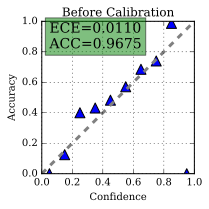

In [3]:
fig, ax = plt.subplots()
fig.set_figheight(3)
fig.set_figwidth(3)
ece, acc, ax = reliability_plot(ax, score, Y_true, NUM_BINS)
ax.set_title("Before Calibration")
fig.tight_layout()

In [4]:
# train a Spline regression model using all available data points as a reference model.
# MSE between this spline curve and the one trained on selected datapoints will be computed as a metric for evaluation.
gam_ref = LogisticGAM(s(0, constraints='monotonic_inc')).gridsearch(
                    np.max(score, axis=1).reshape(-1, 1),
                    np.array(Y_true == Y_predict) * 1) # add a linear term

100% (11 of 11) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


100% (11 of 11) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8579
Link Function:                        LogitLink Log Likelihood:                                 -2423.1331
Number of Samples:                        26032 AIC:                                              4851.982
                                                AICc:                                            4851.9834
                                                UBRE:                                               2.1865
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3499
Feature Function                  Lam

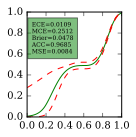

In [5]:
# feed all data into spline regression
fig, ax = plt.subplots()
fig.set_figheight(2)
fig.set_figwidth(2)
ece, mce, brier, acc, mse, ax, confi = spline_classification_plot(ax,
                           np.max(score, axis=1).reshape(-1, 1),
                           np.array(Y_true == Y_predict) * 1,
                           np.max(score, axis=1).reshape(-1, 1),
                           np.array(Y_true == Y_predict) * 1,
                           gam_ref)
fig.tight_layout()

In [6]:
training_list = [i for i in range(N)]
subset_init = np.random.choice(training_list, size = NUM_SAMPLES[0], replace = False).tolist()

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.4114
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           20 AIC:                                                2.8228
                                                AICc:                                               3.8145
                                                UBRE:                                               2.1976
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      0.9487
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           30 AIC:                                                1.8975
                                                AICc:                                               2.3223
                                                UBRE:                                               2.0885
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3729
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           40 AIC:                                                2.7458
                                                AICc:                                               3.1829
                                                UBRE:                                               2.0961
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3609
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           50 AIC:                                                2.7218
                                                AICc:                                               3.0621
                                                UBRE:                                               2.0762
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3467
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           60 AIC:                                                2.6933
                                                AICc:                                               2.9706
                                                UBRE:                                               2.0628
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3323
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           70 AIC:                                                2.6646
                                                AICc:                                               2.8978
                                                UBRE:                                               2.0533
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       1.331
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           80 AIC:                                                 2.662
                                                AICc:                                               2.8646
                                                UBRE:                                               2.0466
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3224
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           90 AIC:                                                2.6449
                                                AICc:                                               2.8229
                                                UBRE:                                               2.0411
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3162
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                          100 AIC:                                                2.6323
                                                AICc:                                               2.7912
                                                UBRE:                                               2.0369
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.2969
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                          150 AIC:                                                2.5937
                                                AICc:                                                2.697
                                                UBRE:                                               2.0242
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -2.5397
Number of Samples:                          200 AIC:                                                9.0794
                                                AICc:                                               9.2018
                                                UBRE:                                               2.0534
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.7732
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -3.1083
Number of Samples:                          250 AIC:                                               10.2165
                                                AICc:                                              10.3141
                                                UBRE:                                               2.0473
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.8087
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -3.1083
Number of Samples:                          300 AIC:                                               10.2166
                                                AICc:                                              10.2977
                                                UBRE:                                               2.0394
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.815
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -9.3999
Number of Samples:                          350 AIC:                                               22.7999
                                                AICc:                                              22.8692
                                                UBRE:                                               2.0697
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5701
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.2555
Link Function:                        LogitLink Log Likelihood:                                     -21.17
Number of Samples:                          400 AIC:                                               48.8509
                                                AICc:                                              48.9642
                                                UBRE:                                               2.1286
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5082
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.3953
Link Function:                        LogitLink Log Likelihood:                                    -23.821
Number of Samples:                          450 AIC:                                               54.4326
                                                AICc:                                              54.5393
                                                UBRE:                                                2.127
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5392
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.7174
Link Function:                        LogitLink Log Likelihood:                                   -27.9341
Number of Samples:                          500 AIC:                                               61.3031
                                                AICc:                                              61.3739
                                                UBRE:                                                2.127
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5366
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.4492
Link Function:                        LogitLink Log Likelihood:                                   -29.0217
Number of Samples:                          550 AIC:                                               64.9417
                                                AICc:                                              65.0307
                                                UBRE:                                               2.1231
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.555
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.4646
Link Function:                        LogitLink Log Likelihood:                                   -33.2269
Number of Samples:                          600 AIC:                                                73.383
                                                AICc:                                               73.465
                                                UBRE:                                               2.1269
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.5263
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.4747
Link Function:                        LogitLink Log Likelihood:                                   -40.2101
Number of Samples:                          650 AIC:                                               87.3696
                                                AICc:                                              87.4456
                                                UBRE:                                               2.1387
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4644
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8373
Link Function:                        LogitLink Log Likelihood:                                   -46.8391
Number of Samples:                          700 AIC:                                               99.3529
                                                AICc:                                              99.4063
                                                UBRE:                                               2.1452
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4843
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8449
Link Function:                        LogitLink Log Likelihood:                                   -51.4306
Number of Samples:                          750 AIC:                                               108.551
                                                AICc:                                              108.601
                                                UBRE:                                               2.1478
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4996
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8515
Link Function:                        LogitLink Log Likelihood:                                   -57.8742
Number of Samples:                          800 AIC:                                              121.4515
                                                AICc:                                             121.4985
                                                UBRE:                                               2.1547
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4798
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8589
Link Function:                        LogitLink Log Likelihood:                                   -61.7201
Number of Samples:                          850 AIC:                                               129.158
                                                AICc:                                             129.2024
                                                UBRE:                                               2.1546
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4844
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.7085
Link Function:                        LogitLink Log Likelihood:                                   -67.9415
Number of Samples:                          900 AIC:                                                 141.3
                                                AICc:                                              141.339
                                                UBRE:                                               2.1594
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4835
Feature Function                  Lam

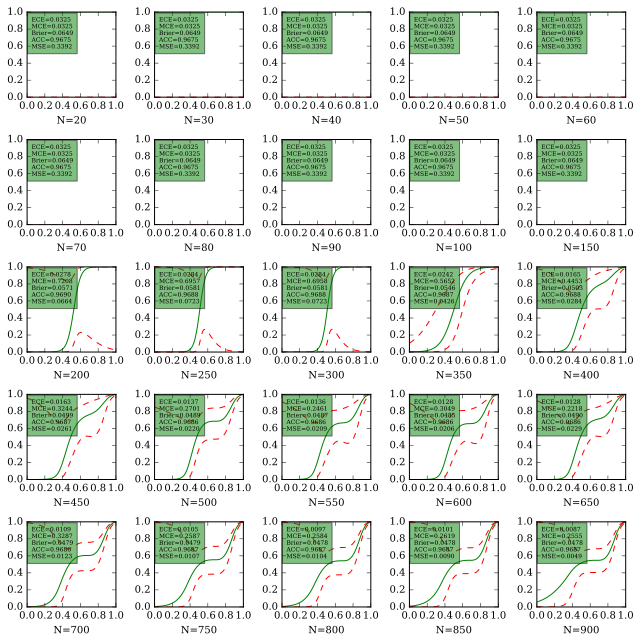

In [7]:
ece_random_emp, mce_random_emp, brier_random_emp, acc_random_emp, mse_random_emp, subset_random_emp = active_learning_plot(
    score, Y_predict, Y_true, acq_random_emp, subset_init, training_list, NUM_SAMPLES, gam_ref)

# active learning

### randomly select datapoints and feed to spline regression

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.4114
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           20 AIC:                                                2.8228
                                                AICc:                                               3.8145
                                                UBRE:                                               2.1976
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -7.7873
Number of Samples:                           30 AIC:                                               19.5748
                                                AICc:                                              20.4979
                                                UBRE:                                               2.7058
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4239
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                   -12.6501
Number of Samples:                           40 AIC:                                               29.3002
                                                AICc:                                              29.9669
                                                UBRE:                                               2.7725
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4376
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.1591
Link Function:                        LogitLink Log Likelihood:                                   -20.9934
Number of Samples:                           50 AIC:                                               46.3049
                                                AICc:                                              46.8782
                                                UBRE:                                               2.9606
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3127
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.3543
Link Function:                        LogitLink Log Likelihood:                                   -25.6366
Number of Samples:                           60 AIC:                                               55.9817
                                                AICc:                                              56.5066
                                                UBRE:                                               2.9644
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3005
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8852
Link Function:                        LogitLink Log Likelihood:                                   -30.2839
Number of Samples:                           70 AIC:                                               66.3382
                                                AICc:                                              66.9211
                                                UBRE:                                               2.9807
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2918
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0002
Link Function:                        LogitLink Log Likelihood:                                   -34.4986
Number of Samples:                           80 AIC:                                               72.9974
                                                AICc:                                              73.3132
                                                UBRE:                                               2.9325
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2509
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0002
Link Function:                        LogitLink Log Likelihood:                                   -37.5857
Number of Samples:                           90 AIC:                                               79.1717
                                                AICc:                                              79.4508
                                                UBRE:                                               2.8975
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2652
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0002
Link Function:                        LogitLink Log Likelihood:                                   -43.1658
Number of Samples:                          100 AIC:                                               90.3319
                                                AICc:                                              90.5819
                                                UBRE:                                               2.9193
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2934
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9362
Link Function:                        LogitLink Log Likelihood:                                   -73.0128
Number of Samples:                          150 AIC:                                               151.898
                                                AICc:                                             152.1659
                                                UBRE:                                               3.0283
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2593
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9447
Link Function:                        LogitLink Log Likelihood:                                  -101.5214
Number of Samples:                          200 AIC:                                              208.9322
                                                AICc:                                             209.1322
                                                UBRE:                                               3.0564
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2232
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9538
Link Function:                        LogitLink Log Likelihood:                                  -129.5975
Number of Samples:                          250 AIC:                                              265.1025
                                                AICc:                                             265.2624
                                                UBRE:                                               3.0699
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2066
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.7142
Link Function:                        LogitLink Log Likelihood:                                  -158.3065
Number of Samples:                          300 AIC:                                              322.0414
                                                AICc:                                               322.16
                                                UBRE:                                               3.0807
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1948
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8506
Link Function:                        LogitLink Log Likelihood:                                   -178.374
Number of Samples:                          350 AIC:                                              364.4493
                                                AICc:                                             364.6142
                                                UBRE:                                               3.0501
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.216
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9651
Link Function:                        LogitLink Log Likelihood:                                  -207.6342
Number of Samples:                          400 AIC:                                              421.1987
                                                AICc:                                             421.2984
                                                UBRE:                                               3.0589
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.209
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9688
Link Function:                        LogitLink Log Likelihood:                                  -234.4267
Number of Samples:                          450 AIC:                                               474.791
                                                AICc:                                             474.8796
                                                UBRE:                                               3.0604
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2027
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.9716
Link Function:                        LogitLink Log Likelihood:                                  -259.8595
Number of Samples:                          500 AIC:                                              525.6622
                                                AICc:                                              525.742
                                                UBRE:                                               3.0561
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2018
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6357
Link Function:                        LogitLink Log Likelihood:                                   -290.016
Number of Samples:                          550 AIC:                                              587.3034
                                                AICc:                                             587.3994
                                                UBRE:                                               3.0731
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1774
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6487
Link Function:                        LogitLink Log Likelihood:                                  -314.1881
Number of Samples:                          600 AIC:                                              635.6735
                                                AICc:                                             635.7619
                                                UBRE:                                               3.0643
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1831
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6588
Link Function:                        LogitLink Log Likelihood:                                  -340.7965
Number of Samples:                          650 AIC:                                              688.9105
                                                AICc:                                             688.9923
                                                UBRE:                                               3.0644
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1795
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6726
Link Function:                        LogitLink Log Likelihood:                                  -363.9526
Number of Samples:                          700 AIC:                                              735.2505
                                                AICc:                                             735.3268
                                                UBRE:                                               3.0546
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.184
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6792
Link Function:                        LogitLink Log Likelihood:                                  -390.6979
Number of Samples:                          750 AIC:                                              788.7543
                                                AICc:                                             788.8257
                                                UBRE:                                               3.0556
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1862
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6834
Link Function:                        LogitLink Log Likelihood:                                  -411.0524
Number of Samples:                          800 AIC:                                              829.4716
                                                AICc:                                             829.5386
                                                UBRE:                                               3.0405
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1909
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6919
Link Function:                        LogitLink Log Likelihood:                                  -438.5669
Number of Samples:                          850 AIC:                                              884.5176
                                                AICc:                                             884.5809
                                                UBRE:                                               3.0441
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1859
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6966
Link Function:                        LogitLink Log Likelihood:                                  -464.5278
Number of Samples:                          900 AIC:                                              936.4488
                                                AICc:                                             936.5086
                                                UBRE:                                               3.0438
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1861
Feature Function                  Lam

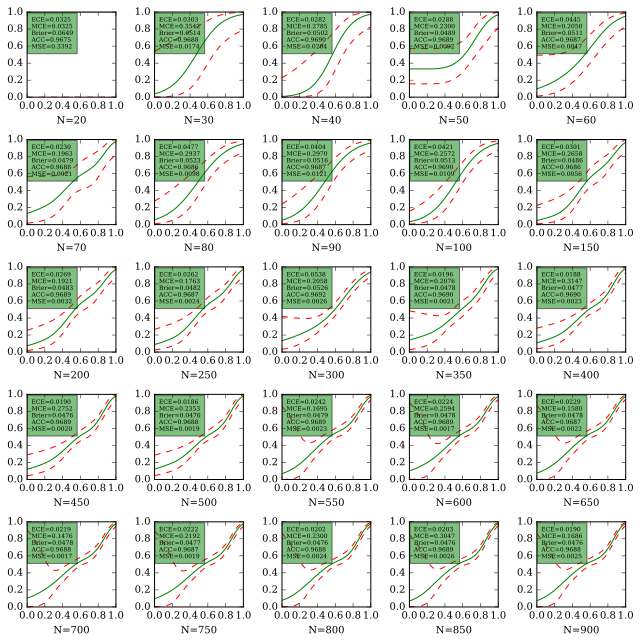

In [8]:
ece_random_unf, mce_random_unf, brier_random_unf, acc_random_unf, mse_random_unf, subset_random_unf = active_learning_plot(
    score, Y_predict, Y_true, acq_random_unf, subset_init, training_list, NUM_SAMPLES, gam_ref)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.4114
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           20 AIC:                                                2.8228
                                                AICc:                                               3.8145
                                                UBRE:                                               2.1976
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                    -8.0108
Number of Samples:                           30 AIC:                                               20.0217
                                                AICc:                                              20.9448
                                                UBRE:                                               2.7207
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4664
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         2.0
Link Function:                        LogitLink Log Likelihood:                                   -12.8063
Number of Samples:                           40 AIC:                                               29.6128
                                                AICc:                                              30.2794
                                                UBRE:                                               2.7803
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4759
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -22.9252
Number of Samples:                           50 AIC:                                               49.8507
                                                AICc:                                              50.3724
                                                UBRE:                                                3.029
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2983
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -29.7783
Number of Samples:                           60 AIC:                                               63.5569
                                                AICc:                                              63.9855
                                                UBRE:                                               3.0859
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2448
Feature Function                  Lam

 72% (8 of 11) |##################       | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.4821
Link Function:                        LogitLink Log Likelihood:                                   -33.6679
Number of Samples:                           70 AIC:                                                  74.3
                                                AICc:                                              75.0617
                                                UBRE:                                               3.1012
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2787
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                    -40.728
Number of Samples:                           80 AIC:                                               85.4564
                                                AICc:                                              85.7722
                                                UBRE:                                               3.0882
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2488
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.7287
Link Function:                        LogitLink Log Likelihood:                                   -46.9079
Number of Samples:                           90 AIC:                                               99.2732
                                                AICc:                                              99.6867
                                                UBRE:                                               3.1273
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2383
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.7752
Link Function:                        LogitLink Log Likelihood:                                   -54.3994
Number of Samples:                          100 AIC:                                              114.3491
                                                AICc:                                             114.7277
                                                UBRE:                                               3.1657
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2039
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.2013
Link Function:                        LogitLink Log Likelihood:                                   -84.8508
Number of Samples:                          150 AIC:                                              174.1041
                                                AICc:                                             174.2886
                                                UBRE:                                               3.1724
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1733
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.5873
Link Function:                        LogitLink Log Likelihood:                                  -117.1366
Number of Samples:                          200 AIC:                                              239.4478
                                                AICc:                                             239.6163
                                                UBRE:                                               3.2076
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.141
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.6602
Link Function:                        LogitLink Log Likelihood:                                  -151.3715
Number of Samples:                          250 AIC:                                              308.0633
                                                AICc:                                             308.2024
                                                UBRE:                                               3.2408
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1064
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
N/A% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.5452
Link Function:                        LogitLink Log Likelihood:                                  -180.4456
Number of Samples:                          300 AIC:                                              367.9817
                                                AICc:                                             368.1529
                                                UBRE:                                               3.2361
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1097
Feature Function                  Lam

 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00

did not converge


100% (11 of 11) |########################| Elapsed Time: 0:00:01 Time:  0:00:01
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       3.583
Link Function:                        LogitLink Log Likelihood:                                   -210.941
Number of Samples:                          350 AIC:                                               429.048
                                                AICc:                                             429.1966
                                                UBRE:                                                3.234
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1029
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.5939
Link Function:                        LogitLink Log Likelihood:                                  -238.3103
Number of Samples:                          400 AIC:                                              483.8084
                                                AICc:                                             483.9388
                                                UBRE:                                               3.2167
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1134
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6258
Link Function:                        LogitLink Log Likelihood:                                  -267.5848
Number of Samples:                          450 AIC:                                              542.4212
                                                AICc:                                             542.5384
                                                UBRE:                                               3.2118
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.121
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 18% (2 of 11) |####                     | Elapsed Time: 0:00:00 ETA:  00:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       3.814
Link Function:                        LogitLink Log Likelihood:                                  -298.3871
Number of Samples:                          500 AIC:                                              604.4022
                                                AICc:                                             604.5155
                                                UBRE:                                               3.2149
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1174
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6218
Link Function:                        LogitLink Log Likelihood:                                  -330.6268
Number of Samples:                          550 AIC:                                              668.4972
                                                AICc:                                             668.5927
                                                UBRE:                                               3.2207
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1105
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                       3.635
Link Function:                        LogitLink Log Likelihood:                                  -363.1067
Number of Samples:                          600 AIC:                                              733.4833
                                                AICc:                                             733.5711
                                                UBRE:                                               3.2273
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1034
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6539
Link Function:                        LogitLink Log Likelihood:                                  -392.2163
Number of Samples:                          650 AIC:                                              791.7404
                                                AICc:                                              791.822
                                                UBRE:                                               3.2226
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1017
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6646
Link Function:                        LogitLink Log Likelihood:                                  -419.1142
Number of Samples:                          700 AIC:                                              845.5578
                                                AICc:                                             845.6339
                                                UBRE:                                               3.2121
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1047
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6662
Link Function:                        LogitLink Log Likelihood:                                  -444.1794
Number of Samples:                          750 AIC:                                              895.6912
                                                AICc:                                             895.7623
                                                UBRE:                                               3.1982
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1107
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6731
Link Function:                        LogitLink Log Likelihood:                                  -472.8647
Number of Samples:                          800 AIC:                                              953.0757
                                                AICc:                                             953.1424
                                                UBRE:                                                3.195
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1123
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6805
Link Function:                        LogitLink Log Likelihood:                                  -495.9426
Number of Samples:                          850 AIC:                                              999.2462
                                                AICc:                                             999.3092
                                                UBRE:                                                3.179
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1198
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6868
Link Function:                        LogitLink Log Likelihood:                                  -521.5068
Number of Samples:                          900 AIC:                                             1050.3874
                                                AICc:                                             1050.447
                                                UBRE:                                               3.1704
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1222
Feature Function                  Lam

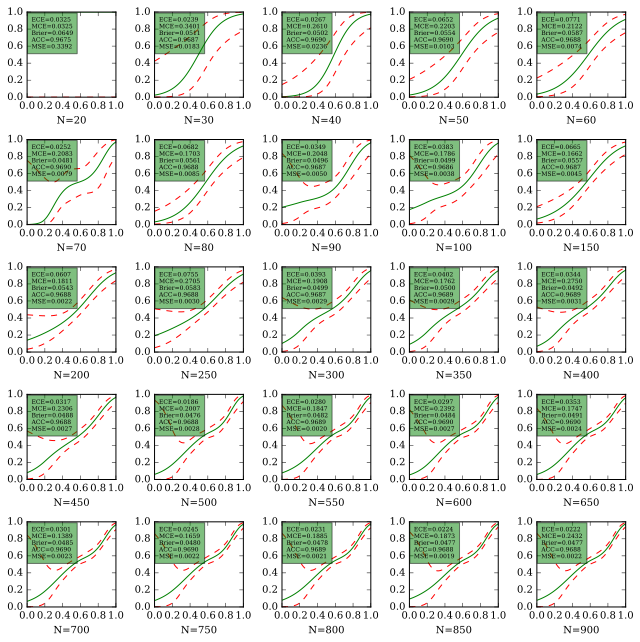

In [9]:
ece_random_ent, mce_random_ent, brier_random_ent, acc_random_ent, mse_random_ent, subset_random_ent = active_learning_plot(
    score, Y_predict, Y_true, acq_random_ent, subset_init, training_list, NUM_SAMPLES, gam_ref)

### actively select datapoints and feed into spline regression

In [10]:
confi[:, 0].min(), confi[:, 0].max(), 

(0.025149921002076858, 0.9899498748330843)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:01

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.4114
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           20 AIC:                                                2.8228
                                                AICc:                                               3.8145
                                                UBRE:                                               2.1976
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.3943
Link Function:                        LogitLink Log Likelihood:                                       -0.0
Number of Samples:                           30 AIC:                                                2.7886
                                                AICc:                                               3.3996
                                                UBRE:                                               2.1301
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                     -inf
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 90% (10 of 11) |#####################   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         1.0
Link Function:                        LogitLink Log Likelihood:                                    -4.6763
Number of Samples:                           40 AIC:                                               11.3525
                                                AICc:                                              11.6769
                                                UBRE:                                               2.3038
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                      0.0
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         1.0
Link Function:                        LogitLink Log Likelihood:                                     -4.902
Number of Samples:                           50 AIC:                                               11.8039
                                                AICc:                                              12.0592
                                                UBRE:                                               2.2521
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                      0.0
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                         1.0
Link Function:                        LogitLink Log Likelihood:                                     -5.086
Number of Samples:                           60 AIC:                                               12.1719
                                                AICc:                                              12.3825
                                                UBRE:                                               2.2162
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                      0.0
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      1.9561
Link Function:                        LogitLink Log Likelihood:                                    -8.5612
Number of Samples:                           70 AIC:                                               21.0346
                                                AICc:                                              21.3887
                                                UBRE:                                               2.3228
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0573
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -16.1707
Number of Samples:                           80 AIC:                                               36.3415
                                                AICc:                                              36.6573
                                                UBRE:                                               2.4743
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3782
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -23.0556
Number of Samples:                           90 AIC:                                               50.1115
                                                AICc:                                              50.3906
                                                UBRE:                                               2.5746
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4073
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -29.0967
Number of Samples:                          100 AIC:                                               62.1936
                                                AICc:                                              62.4436
                                                UBRE:                                               2.6379
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4339
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.0001
Link Function:                        LogitLink Log Likelihood:                                   -63.1272
Number of Samples:                          150 AIC:                                              130.2547
                                                AICc:                                             130.4191
                                                UBRE:                                                2.879
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.3479
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.8605
Link Function:                        LogitLink Log Likelihood:                                   -95.6701
Number of Samples:                          200 AIC:                                              197.0613
                                                AICc:                                             197.2536
                                                UBRE:                                               2.9967
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2913
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.5772
Link Function:                        LogitLink Log Likelihood:                                   -130.967
Number of Samples:                          250 AIC:                                              267.0884
                                                AICc:                                             267.2219
                                                UBRE:                                               3.0766
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.2269
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 45% (5 of 11) |###########              | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      2.6609
Link Function:                        LogitLink Log Likelihood:                                  -167.5277
Number of Samples:                          300 AIC:                                              340.3771
                                                AICc:                                             340.4927
                                                UBRE:                                               3.1417
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1804
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.0646
Link Function:                        LogitLink Log Likelihood:                                  -201.4408
Number of Samples:                          350 AIC:                                              409.0108
                                                AICc:                                             409.1302
                                                UBRE:                                               3.1756
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.154
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6199
Link Function:                        LogitLink Log Likelihood:                                  -234.8275
Number of Samples:                          400 AIC:                                              476.8947
                                                AICc:                                             477.0264
                                                UBRE:                                               3.1995
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                    0.139
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.6783
Link Function:                        LogitLink Log Likelihood:                                  -261.2513
Number of Samples:                          450 AIC:                                              529.8593
                                                AICc:                                             529.9788
                                                UBRE:                                                3.184
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1385
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.7014
Link Function:                        LogitLink Log Likelihood:                                  -296.4389
Number of Samples:                          500 AIC:                                              600.2804
                                                AICc:                                             600.3889
                                                UBRE:                                               3.2065
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1241
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.7205
Link Function:                        LogitLink Log Likelihood:                                  -330.9747
Number of Samples:                          550 AIC:                                              669.3904
                                                AICc:                                             669.4896
                                                UBRE:                                               3.2225
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1139
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 36% (4 of 11) |#########                | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.7569
Link Function:                        LogitLink Log Likelihood:                                  -360.4111
Number of Samples:                          600 AIC:                                              728.3359
                                                AICc:                                             728.4281
                                                UBRE:                                               3.2189
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1101
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.7693
Link Function:                        LogitLink Log Likelihood:                                  -395.1062
Number of Samples:                          650 AIC:                                              797.7511
                                                AICc:                                             797.8365
                                                UBRE:                                               3.2319
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.1051
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8048
Link Function:                        LogitLink Log Likelihood:                                  -426.2914
Number of Samples:                          700 AIC:                                              860.1923
                                                AICc:                                             860.2727
                                                UBRE:                                               3.2332
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0996
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8162
Link Function:                        LogitLink Log Likelihood:                                  -460.6771
Number of Samples:                          750 AIC:                                              928.9866
                                                AICc:                                             929.0619
                                                UBRE:                                               3.2427
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0928
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8514
Link Function:                        LogitLink Log Likelihood:                                  -492.7151
Number of Samples:                          800 AIC:                                              993.1331
                                                AICc:                                             993.2046
                                                UBRE:                                               3.2453
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0875
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
 27% (3 of 11) |######                   | Elapsed Time: 0:00:00 ETA:   0:00:00

LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8617
Link Function:                        LogitLink Log Likelihood:                                  -522.9008
Number of Samples:                          850 AIC:                                             1053.5249
                                                AICc:                                            1053.5924
                                                UBRE:                                               3.2431
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0833
Feature Function                  Lam

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LogisticGAM                                                                                               
=============================================== ==========================================================
Distribution:                      BinomialDist Effective DoF:                                      3.8733
Link Function:                        LogitLink Log Likelihood:                                  -547.0771
Number of Samples:                          900 AIC:                                             1101.9008
                                                AICc:                                            1101.9648
                                                UBRE:                                               3.2278
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.0868
Feature Function                  Lam

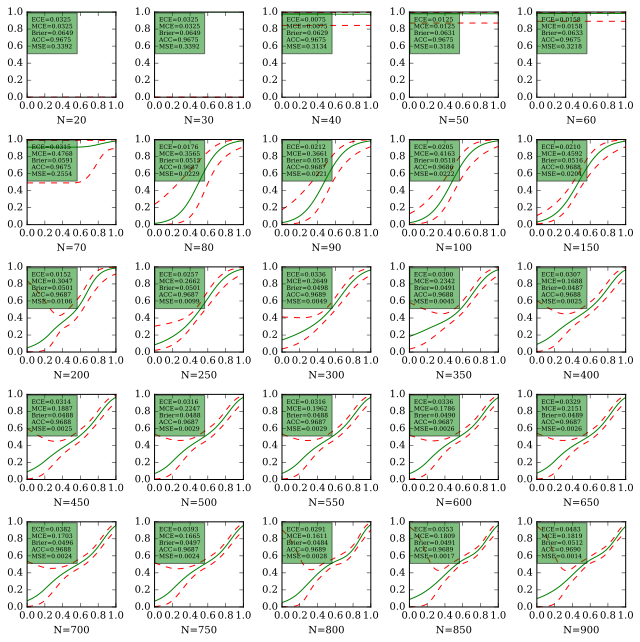

In [11]:
## select data points with highest uncertainty
ece_active_dtm, mce_active_dtm, brier_active_dtm, acc_active_dtm, mse_active_dtm,  subset_active_dtm = active_learning_plot(
    score, Y_predict, Y_true, acq_active_dtm, subset_init, training_list, NUM_SAMPLES, gam_ref)

### Compare different acquisition methods in a single run

In [12]:
plot_metric_single_run(ece_random_emp, mce_random_emp, brier_random_emp, acc_random_emp, mse_random_emp,\
                       ece_random_unf, mce_random_unf, brier_random_unf, acc_random_unf, mse_random_unf,\
                       ece_random_ent, mce_random_ent, brier_random_ent, acc_random_ent, mse_random_ent,\
                       ece_active_prb, mce_active_prb, brier_active_prb, acc_active_prb, mse_active_prb,\
                       ece_active_dtm, mce_active_dtm, brier_active_dtm, acc_active_dtm, mse_active_dtm, NUM_SAMPLES)

NameError: name 'ece_active_prb' is not defined

In [ ]:
# compare the histogram of scores of datapoints selected with different methods
fig, ax = plt.subplots(nrows=1, ncols=5, sharey = True)
fig.set_figheight(2)
fig.set_figwidth(10)
ax[0].hist(np.max(score, axis=1).reshape(-1, 1)[subset_random_emp])
ax[0].set_xlim(0.0, 1.0)
ax[0].set_title("Random_Emp")
ax[1].hist(np.max(score, axis=1).reshape(-1, 1)[subset_random_unf])
ax[1].set_xlim(0.0, 1.0)
ax[1].set_title("Random_Unf")
ax[2].hist(np.max(score, axis=1).reshape(-1, 1)[subset_random_ent])
ax[2].set_xlim(0.0, 1.0)
ax[2].set_title("Random_Ent")
ax[3].hist(np.max(score, axis=1).reshape(-1, 1)[subset_active_prb])
ax[3].set_xlim(0.0, 1.0)
ax[3].set_title("Active_Prb")
ax[4].hist(np.max(score, axis=1).reshape(-1, 1)[subset_active_dtm])
ax[4].set_xlim(0.0, 1.0)
ax[4].set_title("Active_Dtm")

## Multiple runs to get errorbars

In [ ]:
######### run spline_run.py for a given dataset for multiple runs.
# results will be written to output/DATASET with filenames ece_random.csv, 
# ece_active.csv, acc_random.csv, acc_active.csv.

# disij@datalab-5 22:19:44 ~/projects/sandbox/nn_assessor
# python spline_run.py

ece_random_emp_multi_run = LoadCsvFromOutput("output/%s/ece_random_emp.csv" % DATASET)
mce_random_emp_multi_run = LoadCsvFromOutput("output/%s/mce_random_emp.csv" % DATASET)
brier_random_emp_multi_run = LoadCsvFromOutput("output/%s/brier_random_emp.csv" % DATASET)
acc_random_emp_multi_run = LoadCsvFromOutput("output/%s/acc_random_emp.csv" % DATASET)
mse_random_emp_multi_run = LoadCsvFromOutput("output/%s/mse_random_emp.csv" % DATASET)

ece_random_unf_multi_run = LoadCsvFromOutput("output/%s/ece_random_unf.csv" % DATASET)
mce_random_unf_multi_run = LoadCsvFromOutput("output/%s/mce_random_unf.csv" % DATASET)
brier_random_unf_multi_run = LoadCsvFromOutput("output/%s/brier_random_unf.csv" % DATASET)
acc_random_unf_multi_run = LoadCsvFromOutput("output/%s/acc_random_unf.csv" % DATASET)
mse_random_unf_multi_run = LoadCsvFromOutput("output/%s/mse_random_unf.csv" % DATASET)

ece_random_ent_multi_run = LoadCsvFromOutput("output/%s/ece_random_ent.csv" % DATASET)
mce_random_ent_multi_run = LoadCsvFromOutput("output/%s/mce_random_ent.csv" % DATASET)
brier_random_ent_multi_run = LoadCsvFromOutput("output/%s/brier_random_ent.csv" % DATASET)
acc_random_ent_multi_run = LoadCsvFromOutput("output/%s/acc_random_ent.csv" % DATASET)
mse_random_ent_multi_run = LoadCsvFromOutput("output/%s/mse_random_ent.csv" % DATASET)

ece_active_prb_multi_run = LoadCsvFromOutput("output/%s/ece_active_prb.csv" % DATASET)
mce_active_prb_multi_run = LoadCsvFromOutput("output/%s/mce_active_prb.csv" % DATASET)
brier_active_prb_multi_run = LoadCsvFromOutput("output/%s/brier_active_prb.csv" % DATASET)
acc_active_prb_multi_run = LoadCsvFromOutput("output/%s/acc_active_prb.csv" % DATASET)
mse_active_prb_multi_run = LoadCsvFromOutput("output/%s/mse_active_prb.csv" % DATASET)

ece_active_dtm_multi_run = LoadCsvFromOutput("output/%s/ece_active_dtm.csv" % DATASET)
mce_active_dtm_multi_run = LoadCsvFromOutput("output/%s/mce_active_dtm.csv" % DATASET)
brier_active_dtm_multi_run = LoadCsvFromOutput("output/%s/brier_active_dtm.csv" % DATASET)
acc_active_dtm_multi_run = LoadCsvFromOutput("output/%s/acc_active_dtm.csv" % DATASET)
mse_active_dtm_multi_run = LoadCsvFromOutput("output/%s/mse_active_dtm.csv" % DATASET)

In [ ]:
plot_metric_multi_run( ece_random_emp_multi_run, mce_random_emp_multi_run, brier_random_emp_multi_run, \
                              acc_random_emp_multi_run, mse_random_emp_multi_run,\
                       ece_random_unf_multi_run, mce_random_unf_multi_run, brier_random_unf_multi_run, \
                              acc_random_unf_multi_run, mse_random_unf_multi_run,\
                       ece_random_ent_multi_run, mce_random_ent_multi_run, brier_random_ent_multi_run, \
                              acc_random_ent_multi_run, mse_random_ent_multi_run,\
                       ece_active_prb_multi_run, mce_active_prb_multi_run, brier_active_prb_multi_run, \
                              acc_active_prb_multi_run, mse_active_prb_multi_run,\
                       ece_active_dtm_multi_run, mce_active_dtm_multi_run, brier_active_dtm_multi_run, \
                              acc_active_dtm_multi_run, mse_active_dtm_multi_run, NUM_SAMPLES)

In [ ]:
plot_metric_multi_run( ece_random_emp_multi_run, mce_random_emp_multi_run, brier_random_emp_multi_run, \
                              acc_random_emp_multi_run, mse_random_emp_multi_run,\
                       ece_random_unf_multi_run, mce_random_unf_multi_run, brier_random_unf_multi_run, \
                              acc_random_unf_multi_run, mse_random_unf_multi_run,\
                       ece_random_ent_multi_run, mce_random_ent_multi_run, brier_random_ent_multi_run, \
                              acc_random_ent_multi_run, mse_random_ent_multi_run,\
                       ece_active_prb_multi_run, mce_active_prb_multi_run, brier_active_prb_multi_run, \
                              acc_active_prb_multi_run, mse_active_prb_multi_run,\
                       ece_active_dtm_multi_run, mce_active_dtm_multi_run, brier_active_dtm_multi_run, \
                              acc_active_dtm_multi_run, mse_active_dtm_multi_run, NUM_SAMPLES[0:10])